In [2]:
import matplotlib
matplotlib.use('Agg')

%load_ext autoreload
%autoreload 2

%matplotlib tk
%autosave 180
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import os

import glob2

# visualize results module
from Visualize import Visualize

# 
#data_dir = '/media/cat/4TBSSD/yuki/'
data_dir = '/media/cat/4TBSSD/yuki/'


Autosaving every 180 seconds


In [3]:
##########################
####### INITIALIZE #######
##########################
# LEVER PULL
vis = Visualize()

# lever-related data
vis.main_dir = data_dir
vis.random_flag = False  # shuffle data to show baseline

# 
vis.window = 15
vis.lockout_window = 10
vis.code = 'left_paw'
vis.lockout = False

vis.pca_var = 0.95
vis.pca_flag = True


In [3]:
# ###############################
# ######## PLOT SVM CHOICE ######
# ###############################
# vis.animal_id = "IJ2"
# vis.smooth_window = 30
# vis.min_trials = 30

# vis.plot_decision_choice_all()


In [4]:
#########################################
######## PLOT SVM CHOICE SESSION ########
#########################################
vis.significance = 0.05
vis.linewidth=10

#
vis.cbar_offset = 0
vis.smooth_window = 30
vis.lockout = False
vis.xvalidation = 10
vis.sliding_window = 30

# 
vis.min_trials = 10

############################
# Fig 2E
vis.window = 15

# examples > 10 sec
#vis.animal_id = "AQ2"
#vis.session_id = 'Feb12_'
#vis.session_id = 'Mar15_'
#vis.session_id = 'Mar18_'
#vis.session_id = 'Apr4_'
#vis.session_id = 'Apr22_'

vis.animal_id = 'IA1'

vis.cbar_thick = 0.05

# # 


# # 
# vis.save_fname = '/home/cat/predict.png'

alpha = 1.0
#sessions = ['IJ2pm_Feb29_30Hz','IJ2pm_Mar1_30Hz','IJ2pm_Mar2_30Hz','IJ2pm_Mar3_30Hz','IJ2am_Mar7_30Hz' ]
sessions = ['IA1pm_Feb5_30Hz' ]

for session in sessions:
    vis.fig=plt.figure(figsize=(10,20))
    vis.ax = plt.subplot(111)

        #if lockout==False:
#     vis.session_id = session
#     vis.cmap = "Blues_r"
    vis.alpha = alpha
#     vis.plot_significant('blue',vis.session_id)

#     print ("")
#     vis.session_id = 'concatenated'
# #     vis.fname = '/media/cat/4TBSSD/yuki/IJ2/SVM_Scores/SVM_Scores_concatenatedcode_04_trial_ROItimeCourses_30sec_Xvalid5_Slidewindow30_5PCA_5PCA.npz'
# #     vis.cmap = "Greens_r"
#     vis.title = '5pca'
#     vis.title_offset = 0
#     vis.cbar=True
# #     vis.plot_significant_concatenated('green',vis.session_id)

    vis.session_id = 'concatenated'
    vis.fname = '/media/cat/4TBSSD/yuki/IJ2/SVM_Scores/SVM_Scores_concatenated_code_04_trial_ROItimeCourses_30sec_Xvalid10_Slidewindow30.npz'
    vis.cmap = "Reds_r"
    vis.title = '20pca'
    vis.cbar=True
    vis.title_offset = -0.05
    vis.plot_significant_concatenated('red',vis.session_id)
    


    vis.cbar_offset=0
    plt.show()
    break

loaded data:  (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
earliest:  459  in sec:  -12.733333333333333
vmin, vmax;  0.0 0.05 ticks:  [0.         0.01666667 0.03333333 0.05      ]


/home/cat/code/widefieldPredict/visualize/Visualize.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot([0,0],
/home/cat/code/widefieldPredict/visualize/Visualize.py:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot([xlims[0],xlims[1]],


AttributeError: 'Visualize' object has no attribute 'session'

In [5]:
#####################################
####### PLOT PREDICTOIN TRENDS ######
#####################################

def compute_significance(data,
                         significance):

        #print ("self.data: ", data.shape)
        
        mean = data.mean(1)
        #
        sig = []
        for k in range(data.shape[0]):
            #res = stats.ks_2samp(self.data[k],
            #                     control)
            #res = stats.ttest_ind(first, second, axis=0, equal_var=True)

            #
            res = scipy.stats.ttest_1samp(data[k], 0.5)

            sig.append(res[1])


        sig_save = np.array(sig).copy()
        #print ("Self sig save: ", sig_save.shape)

        # multiple hypothesis test
        temp = np.array(sig)
        #print ("data into multi-hypothesis tes:", temp.shape)
        temp2 = multipletests(temp, alpha=significance, method='fdr_bh')
        sig = temp2[1]

        #
        sig=np.array(sig)[None]

        #
        thresh = significance
        idx = np.where(sig>thresh)
        sig[idx] = np.nan

        #
        idx = np.where(mean<0.5)
        sig[:,idx] = np.nan
        #print ("SIG: ", sig.shape)

        # find earliest 
        earliest_continuous = 0
        for k in range(sig.shape[1]-1,0,-1):
            if sig[0][k]<=significance:
                earliest_continuous = k
            else:
                break
                
        earliest_continuous = -(sig.shape[1]-earliest_continuous)/30.
                
        return sig, earliest_continuous
        
        
names = ['IA1','IA2','IA3','IJ1','IJ2', 'AQ2']

fig, ax = plt.subplots()
import scipy
from statsmodels.stats.multitest import multipletests

smooth = True
smooth_window = 6
significance = 0.05
auc = []
early = []
from tqdm import tqdm, trange
for k, name in enumerate(names):
    fnames = np.loadtxt('/media/cat/4TBSSD/yuki/'+name+'/concatenated_svm.txt',dtype='str') #[::-1]

    ax=plt.subplot(2,3,k+1)
    colors = plt.cm.viridis(np.linspace(0,1,len(fnames)))

    auc.append([])
    early.append([])
    for ctr,fname in tqdm(enumerate(fnames)):

        data = np.load(fname, allow_pickle=True)
        acc = data['accuracy']

        if smooth:            
            data = []
            for p in range(acc.shape[1]):
                box = np.ones(smooth_window)/smooth_window
                trace_smooth = np.convolve(acc[:,p], 
                                           box, 
                                           mode='valid')

                data.append(trace_smooth)
            data = np.array(data)
            acc = np.array(data).copy().T

        # 
        mean = acc.mean(1)

        t = np.arange(mean.shape[0])/30-29
        ax.plot(t,mean,
                linewidth=2,
                color=colors[ctr])
    
        # append area under cruve up to t = -10sec
        #print (mean.shape)
        temp = mean[-300:]  # last 10sec prior to movement
        auc[k].append(temp.sum())
        
        sig, earliest = compute_significance(data.T,
                                             significance)
        early[k].append(earliest)
        
    plt.ylim(0.4,1.0)
    plt.xlim(-15,0)
    plt.plot([-30,0],[0.5,0.5],'--',c='black')


46it [00:16,  2.83it/s]
33it [00:11,  2.82it/s]
17it [00:05,  2.88it/s]


KeyboardInterrupt: 

In [268]:
#########################################
########### AUC AND EARLY PLOTS #########
#########################################

# fig2=plt.figure()
# for k in range(len(auc)):
#     plt.plot(auc[k], label=names[k],
#             linewidth=4)
# plt.legend(fontsize=20)

colors = ['black','blue','red','green','magenta','pink','cyan']
ids= ["M1","M2","M3","M4","M5","M6",]
fig2=plt.figure()
for k in range(len(early)):
    temp = np.array(early[k])
    idx =np.where(temp<-20)[0]
    temp[idx]=temp[idx-1]
    t = np.arange(temp.shape[0])
    
    #
    temp2 = np.poly1d(np.polyfit(t, temp, 1))(t)
    plt.plot(t, temp2,
             linewidth=6,
             label=ids[k]+ " ***** ",

             c=colors[k])

    # 
    corr = scipy.stats.pearsonr(t,temp2)
        
    plt.scatter(t,
                temp, 
                #label=names[k]+ " "+str(round(corr[0],2))+
                #                        " ("+str("pval: {0:.1}".format(corr[1]))+")",
                s=100,
                linewidth=4,
                c=colors[k],
                alpha=.3)
    #t = np.arange(auc1.shape[0])/(auc1.shape[0]-1)


#
plt.xlim(0,80)
plt.ylim(-12,0)
plt.legend(fontsize=20)
plt.show()


In [196]:
#############################################################
### COMPUTE DISTRIBUTION OF FIRST SIG DECODING ALL ANIMALS ##
#############################################################
from tqdm import trange

# lever-related data
vis.main_dir = data_dir
vis.random_flag = False  # shuffle data to show baseline

# 
vis.window = 30
vis.lockout_window = 10
vis.code = 'code_04'
vis.lockout = False
vis.imaging_rate = 30.
vis.pca_var = 0.95
vis.pca_flag = True
vis.xvalidation = 10
vis.sliding_window = 30

# 
vis.smooth_window = 30
vis.min_trials = 20

#
vis.significance=1E-2

# if already computed
if False:
    #lockouts = [False, True]
    lockouts = [False]
    vis.compute_first_decoding_time(lockouts)

# if already computed
if True:
    #lockouts = [False, True]
    lockouts = [False]
    vis.compute_first_decoding_time_concatenated(lockouts)



  0%|          | 0/6 [00:00<?, ?it/s]

 ... data missing /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb1_30Hz/IA1pm_Feb1_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
 ... data missing /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb4_30Hz/IA1pm_Feb4_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb5_30Hz/IA1pm_Feb5_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  

Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
 ... data missing /media/cat/4TBSSD/yuki/IA1/tif_files/IA1am_May13_Week5_30Hz/IA1am_May13_Week5_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/IA1/tif_files/IA1am_May16_Week6_30Hz/IA1am_May16_Week6_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data in

 17%|█▋        | 1/6 [00:17<01:28, 17.70s/it]

Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
 ... data missing /media/cat/4TBSSD/yuki/IA2/tif_files/IA2pm_Feb1_30Hz/IA2pm_Feb1_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/IA2/tif_files/IA2pm_Feb2_30Hz/IA2pm_Feb2_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
 ... data missing /media/cat/4TBSSD/yuki/IA2/tif_files/IA2pm_Feb9_30Hz/IA2pm_Feb9_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/IA2/tif_files/IA2pm_Feb10_30Hz/IA2pm_Fe

 33%|███▎      | 2/6 [00:28<00:54, 13.63s/it]

Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
 ... data missing /media/cat/4TBSSD/yuki/IA3/tif_files/IA3pm_Feb10_30Hz/IA3pm_Feb10_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 8

 50%|█████     | 3/6 [00:41<00:40, 13.53s/it]

Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10

 67%|██████▋   | 4/6 [00:54<00:26, 13.35s/it]

Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
 ... data missing /media/cat/4TBSSD/yuki/IJ1/tif_files/IJ1pm_Apr7_30Hz/IJ1pm_Apr7_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
 ... data missing /media/cat/4TBSSD/yuki/IJ2/tif_files/IJ2pm_Feb9_30Hz/IJ2pm_Feb9_30Hz_globalPca_min_trials_concatenated200_co

 83%|████████▎ | 5/6 [01:07<00:13, 13.14s/it]

Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
 ... data missing /media/cat/4TBSSD/yuki/AQ2/tif_files/AQ2am_Dec9_30Hz/AQ2am_Dec9_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/AQ2/tif_files/AQ2am_Dec10_30Hz/AQ2am_Dec10_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/AQ2/tif_files/AQ2pm_Dec10_30Hz/AQ2pm_Dec10_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/AQ2/tif_files/AQ2am_Dec11_30Hz/AQ2am_Dec11_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/AQ2/tif_files/AQ2pm_Dec14_30Hz/AQ2pm_Dec14_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
 ... data missing /media/cat/4TBSSD/yuki/AQ2/tif_files/AQ2am_Dec14_30Hz/AQ2am_Dec14_30Hz_globalPca_min_trials_concatenated200_code_04_30sec_accuracy.npz
L

Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10)
self.data:  (841, 10)
Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)
LOADED: DATA (870, 10

100%|██████████| 6/6 [01:33<00:00, 15.56s/it]

Self sig save:  (841,)
data into multi-hypothesis tes: (841,)
Final sig:  (1, 841)



/media/cat/4TBSSD/anaconda3/envs/wide/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [7]:
#############################################################
#### PLOT DISTRIBUTION OF FIRST SIG DECODING ALL ANIMALS ####
#############################################################

# return all session ids that can be predicted longer than this:
return_ids_threshold = -10

vis.window = 30
vis.lockout_window = 10

# 
vis.min_trials = 20  #min trials used for SVM

vis.lockout=False
# 
clrs = ['blue','green']
vis.plot_first_decoding_time(return_ids_threshold, clrs)

# 
if True:
    plt.ylim(-15,0)
    plt.show()
else:
    plt.savefig('/home/cat/first.png',dpi=600)
    plt.close()

all:  ['AQ2am_Feb12_30Hz' 'AQ2am_Feb15_30Hz']
all:  [60 61]
[[-2.8000000000000007, -7.266666666666666, -3.7333333333333343, -2.366666666666667, -3.033333333333335, -3.1999999999999993, -4.033333333333335, -3.466666666666665, -2.2666666666666657, -1.2333333333333343, -3.666666666666668, -2.533333333333335, -2.866666666666667, -2.966666666666665, -2.0666666666666664, -1.0, -2.0666666666666664, -3.2333333333333343, -2.333333333333332, -2.333333333333332, -1.9333333333333336, -1.0, -2.2666666666666657, -1.5666666666666664, -2.4333333333333336, -2.0666666666666664, -1.466666666666665, -1.1999999999999993, -2.0666666666666664, -2.0, -1.6999999999999993], [-1.0, -4.300000000000001, -3.7666666666666657, -1.0, -2.966666666666665, -1.0, -2.166666666666668, -1.5, -1.0, -1.0, -2.1000000000000014, -1.0, -1.533333333333335, -1.2666666666666657, -1.0, -1.0, -4.533333333333335, -4.533333333333335, -3.7666666666666657, -4.266666666666666, -3.7333333333333343, -5.300000000000001, -4.133333333333333, -4.

In [6]:
############################################################
#### PLOT CORRELATION OF DECODING TIME AND NO. SESSIONS ####
############################################################
from tqdm import trange

vis.smooth_window = 30
vis.min_trials = 20
vis.animal_id = 'IA1'
vis.session = "Feb1_"
vis.window = 30
vis.xlim=-15

#
vis.significance=0.05 #1E-2
vis.lockout=False

# 
clr='red'
fname = '/media/cat/4TBSSD/yuki/first_decoding_time_minTrials20_lockout_30sec_concatenated_backup.npz'
vis.plot_first_decoding_time_vs_n_trials(clr, fname)

# #
if False:
    plt.show()
else:
    plt.savefig('/home/cat/first.png',dpi=600)
    plt.close()


IA1 Feb1_ [ -4.2         -6.63333333  -4.36666667  -4.63333333  -4.86666667
 -11.43333333 -10.13333333  -6.66666667  -4.43333333  -5.06666667
  -4.2         -4.16666667  -4.33333333  -4.4         -6.33333333
  -4.7         -3.86666667  -4.3         -3.56666667  -3.9
  -3.36666667  -3.96666667  -3.56666667  -3.73333333  -3.86666667
  -3.63333333  -4.26666667  -3.3         -2.86666667  -3.96666667
  -3.66666667  -4.13333333  -3.36666667  -3.26666667  -2.83333333
  -3.63333333  -3.03333333  -3.          -2.7         -3.
  -2.9         -2.66666667  -3.6         -2.43333333  -3.
  -2.46666667  -2.53333333  -2.5         -2.5         -2.16666667
  -2.          -2.          -2.        ]
all preds:  (53, 1)
IA1 Feb1_ [-4.53333333 -4.33333333 -3.13333333 -2.63333333 -2.66666667 -2.
 -2.8        -2.4        -3.13333333 -3.66666667 -2.         -2.
 -2.         -4.96666667 -4.8        -4.83333333 -4.76666667 -5.2
 -8.63333333 -7.36666667 -7.4        -7.2        -7.8        -6.9
 -6.         -4.7   

In [195]:
###################################################
############# PLOT PREDICTOIN TRENDS ##############
###################################################

# FIG 2I, J
names = ['IA1','IA2','IA3','IJ1','IJ2','AQ2']

auc = []
fig, ax = plt.subplots()

for k, name in enumerate(names):
    fnames = np.loadtxt('/media/cat/4TBSSD/yuki/'+name+'/concatenated_svm.txt',dtype='str') #[::-1]

    ax=plt.subplot(2,3,k+1)
    colors = plt.cm.viridis(np.linspace(0,1,len(fnames)))

    smooth = True
    smooth_window = 30
    auc.append([])
    for ctr,fname in enumerate(fnames):

        data = np.load(fname, allow_pickle=True)
        acc = data['accuracy']
        #print (acc.shape)

        if smooth:            
            data = []
            for p in range(acc.shape[1]):
                box = np.ones(smooth_window)/smooth_window
                trace_smooth = np.convolve(acc[:,p], 
                                           box, 
                                           mode='valid')

                data.append(trace_smooth)

            acc = np.array(data).copy().T

        # 
        mean = acc.mean(1)

        t = np.arange(mean.shape[0])/30-29
        ax.plot(t,mean,
                 linewidth=2,
                color=colors[ctr])
    
        # append area under cruve up to t = -10sec
        print (mean.shape)
        temp = mean[-300:]  # last 10sec prior to movement
        auc[k].append(temp.sum())

# 
fig2=plt.figure()
for k in range(len(auc)):
    plt.plot(auc[k], label=names[k],
            linewidth=4)
plt.legend(fontsize=20)
plt.show()

(870, 10)
(870, 436)


In [14]:
######################################################
#################RNN RESULT VISUALIZATION #################
######################################################
# #data1 = np.load('/media/cat/4TBSSD/yuki/IJ2/RNN_scores/Mar3_200_0.0001.npy.npz')
# data1 = np.load('/media/cat/4TBSSD/yuki/IJ2/RNN_scores/IJ2pm_Mar2_30Hz_1000_0.0001.npz')
# #data1 = np.load('/media/cat/4TBSSD/yuki/IJ2/RNN_scores/IJ2pm_Feb29_30Hz_1000_0.0001.npz')
# b = data1['b_rnn']
# c = data1['c_s']

# #
# print (b.shape)
# mean = b.mean(1)
# t=np.linspace(-9.5, 0, mean.shape[0])

# ax=plt.subplot(111)

# plt.plot(t, mean, linewidth=5, c='black', label='RNN - 30 frame sliding window')
# plt.fill_between(t, mean+c, mean-c, color='black', alpha=.2)

# #
# fname_svm = '/media/cat/4TBSSD/yuki/IJ2/SVM_Scores/SVM_Scores_IJ2pm_Mar2_30Hz_code_04_trial_ROItimeCourses_10sec_pca_0.95.npy'
# data2 = np.load(fname_svm)
# print (data2.shape)
# data2 = data2[:300]
# mean = data2.mean(1)
# std = data2.std(1)
# t= np.linspace(t[0],t[-1],mean.shape[0])
# plt.plot(t, mean, linewidth = 5, c='blue', label='SVM - 30 frame sliding window')
# plt.fill_between(t, mean+std, mean-std, color='blue', alpha=.2)


# fname_lstm = '/home/cat/lstm_300.npy'
# data2 = np.load(fname_lstm)
# mean = data2
# print (mean.shape)
# #std = data2.std(1)
# #t = np.linspace(t[0],t[-1],mean.shape[0])
# plt.plot(t, mean, linewidth=5, c= 'green', 
#          label='LSTM - 300 frames')
# #plt.fill_between(t, mean+std, mean-std, color='blue', alpha=.2,
# #                label='SVM - 30 frame sliding window')

# plt.legend(fontsize=20)
# plt.xlim(-10,0)
# plt.ylim(0.0, 1.0)
# plt.plot([-10,0],[0.5,0.5],'r--',c='black')
# ax.tick_params(axis='both', which='major', labelsize=20)
# #plt.suptitle(os.path.split(fname_svm)[1])
# plt.xlabel("Time (sec)",fontsize=20)
# plt.ylabel("Decoding accuracy", fontsize=20)

# plt.show()

(10, 10)
(601, 10)
(300,)


<ipython-input-14-d8154ae9d834>:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([-10,0],[0.5,0.5],'r--',c='black')


In [5]:
#################################################
######### COMPARE RNN VS SVM DECODING ###########
#################################################
# 
fnames_svm = glob2.glob('/media/cat/4TBSSD/yuki/IJ2/SVM_Scores/*.npy')
fnames_rnn= glob2.glob('/media/cat/4TBSSD/yuki/IJ2/RNN_scores/*.npz')

vis.compare_svm_rnn(fnames_svm, fnames_rnn)



In [8]:
############################################################
######## PLOT SVM DECISION TIME - NOT CURRENTLY USED #######
############################################################

print ("TODO: predict decoding time using concatenated data")

svm = PredictSVMTime()
svm.main_dir = '/media/cat/4TBSSD/yuki/'

# default params
svm.lockout = False
svm.lockout_window = 10
svm.pca_flag = True
svm.pca_var = 0.95
svm.window = 10

fig = plt.figure()
svm.animal_id = 'AQ2'
svm.session_id = 'all'
svm.get_sessions()

#
ctr=1
for session_id in svm.sessions:
    ax=plt.subplot(8,10,ctr)
    svm.session_id = session_id
    try:
        svm.plot_decision_time(ax)
        plt.title(session_id+", #: "+str(svm.n_trials_both[0]), fontsize=6)
        if ctr!=1:
            plt.yticks([])
        if ctr!=31:
            plt.xticks([])

        ctr+=1

    except:
        pass
plt.suptitle(svm.animal_id,fontsize=20)



Text(0.5, 0.98, 'AQ2')

In [4]:
data = np.load('/media/cat/4TBSSD/yuki/IJ2/SVM_Scores/SVM_Scores_IJ2am_Mar7_30Hz_code_04_trial_ROItimeCourses_10sec_pca_0.95.npy')
print (data.shape)

(601, 10)


In [ ]:

# vis.main_dir = '/media/cat/4TBSSD/yuki/output_3.7-20210310T074752Z-001/output_3.7/no_midline_filter/'

# fname = vis.main_dir+'/'+animal_id+'/SVM_scores_'+animal_id+'_'+str(session)+'.npy'
# vis.load_data(fname)
# vis.plot_decision_choice('black','all - 30frame windows')

# fname = '/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb3_30Hz/analysis/all_accuracy.npy'
# vis.load_data(fname)
# vis.plot_decision_choice('red','all - 1 frame windows')

# fname = vis.main_dir+'/'+animal_id+'/SVM_scores_'+animal_id+'_lockout_'+str(session)+'.npy'
# vis.load_data(fname)
# vis.plot_decision_choice('magenta','lockout')

# # rnn
# fname = vis.main_dir+'/'+animal_id+'/acc_rnn_'+animal_id+'_'+str(session)+'.npy'
# vis.load_data(fname)
# vis.plot_decision_choice('green','rnn-all-denoised')

# fname = vis.main_dir+'/'+animal_id+'/acc_rnn_'+animal_id+'_lockout_'+str(session)+'.npy'
# vis.load_data(fname)
# vis.plot_decision_choice('cyan','rnn-lockout-denoised')


# # #
# # vis.load_data(fname)
# fname = '/media/cat/4TBSSD/yuki/march_7/IA1pm_Feb23_30Hz_code_04_PCA_Denoised/analysis/all_accuracy.npy'
# #fname = vis.main_dir+'/'+animal_id+'/SVM_scores_'+animal_id+'_'+str(session)+'.npy'

# vis.load_data(fname)
# vis.plot_significant('red','all',animal_id, session)
 
# #
# vis.plot_animal_decision_longitudinal('IA1')

# # 
# vis.plot_animal_decision_AUC_longitudinal()

# # # # # 
# lockout=False
# for ctr, name in enumerate(vis.animal_names):
#     ax=plt.subplot(2,3,ctr+1)
#     vis.plot_animal_decision_longitudinal_matrix(name, lockout, ax)
    

#############################################
############## DECISION TIME ################
#############################################

#
# vis.main_dir = '/media/cat/1TB/yuki/yongxu/lever pull/'

# fname = '/media/cat/4TBSSD/yuki/output_3.7-20210310T074752Z-001/output_3.7/no_midline_filter/IA1/conf_10_IA1_0.npy'
# vis.load_data(fname)
# vis.plot_decision_time('red','all')

# animal_name = "IA1"
# vis.plot_decision_time_animal(animal_name)

# animal_name = 'IA1'
# vis.plot_decision_time_animal_matrix(animal_name)

# # 
# vis.filter=False
# vis.plot_decision_time_all_matrix()



#############################################
############## BODY MOVEMENTS ###############
#############################################

# body movement related data
#vis.main_dir = '/media/cat/1TB/yuki/yongxu/body movement/'

# # 
# body_part = 'right_paw'
# fname = vis.main_dir+'/SVM_scores_'+body_part+'_1.npy'
# vis.load_data(fname)
# vis.plot_decision_choice('red','1', body_part)

# fname = vis.main_dir+'/SVM_scores_'+body_part+'_2.npy'
# vis.load_data(fname)
# vis.plot_decision_choice('blue','2', body_part)

# # # 
# fname = vis.main_dir+'/conf_10_left_paw.npy'
# vis.load_data(fname)
# vis.plot_decision_time('red','left')

# fname = vis.main_dir+'/conf_10_right_paw.npy'
# vis.load_data(fname)
# vis.plot_decision_time('blue','right')

# fname = vis.main_dir+'/conf_10_tongue.npy'
# vis.load_data(fname)
# vis.plot_decision_time('green','tongue')


In [7]:
import pickle as pk

file = open('/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb3_30Hz/IA1pm_Feb3_30Hz_code_04_lockout_10sec_trial_ROItimeCourses_10sec_pca.pkl', 'rb')

# dump information to that file
pca = pk.load(file)

print (pca.components_.shape)


(1500, 16384)


In [9]:
data_stm = np.load('/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb3_30Hz/IA1pm_Feb3_30Hz_10.0sec_butterworth_globalAverage_0.1hz_6.0hz_04code_stm.npy')
print (data_stm.shape)

(62, 601, 128, 128)


In [10]:
# 
X = data_stm.reshape(data_stm.shape[0]*data_stm.shape[1],
                     data_stm.shape[2]*data_stm.shape[3])

mu= np.mean(X, axis=0)


NameError: name 'nComp' is not defined

In [11]:
nComp = 9
Xnew = np.dot(pca.transform(X)[:,:nComp],
             pca.components_[:nComp,:])

Xnew+=mu

data_stm_denoised_reshaped = Xnew.reshape(data_stm.shape[0], data_stm.shape[1],
                                          data_stm.shape[2], data_stm.shape[3])


In [17]:
time_filters = pca.transform(X)[:,:nComp]
pca_time_filters_only = time_filters.reshape(data_stm.shape[0], data_stm.shape[1],-1).transpose(0,2,1)
print (pca_time_filters_only.shape)


(62, 9, 601)


(62, 601, 9)


In [16]:
data2 = np.load('/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb3_30Hz/IA1pm_Feb3_30Hz_code_04_lockout_10sec_trial_ROItimeCourses_10sec.npy')
print (data2.shape)

(40, 35, 601)


In [12]:
print (Xnew.shape)

(37262, 16384)


In [13]:
data_stm_denoised_reshaped.shape

(62, 601, 128, 128)

In [6]:
data = np.load('/media/cat/4TBSSD/yuki/IA1/tif_files.npy')
print (data)

['/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb1_30Hz/IA1pm_Feb1_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb2_30Hz/IA1pm_Feb2_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb3_30Hz/IA1pm_Feb3_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb4_30Hz/IA1pm_Feb4_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb5_30Hz/IA1pm_Feb5_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb9_30Hz/IA1pm_Feb9_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb10_30Hz/IA1pm_Feb10_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb11_30Hz/IA1pm_Feb11_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb12_30Hz/IA1pm_Feb12_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb15_30Hz/IA1pm_Feb15_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_files/IA1pm_Feb16_30Hz/IA1pm_Feb16_30Hz.tif'
 '/media/cat/12TB/in_vivo/tim/yuki/IA1/tif_f

In [21]:
data = np.load('/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb23_30Hz/IA1pm_Feb23_30Hz_code_04_trial_ROItimeCourses_10sec_pca_0.5.npy')
print (data.shape)

(82, 2, 601)


In [5]:
#
data1 = np.load('/home/cat/acc_rnn.npy.npz')
b = data1['b_rnn']
c = data1['c_s']

#
print (b.shape)
mean = b.mean(1)
t=np.linspace(-9.5, 9.5, mean.shape[0])
plt.plot(t, mean, c='black')
plt.fill_between(t, mean+c, mean-c, color='black', alpha=.2)

# 
data2 = np.load('/home/cat/acc_rnn.npy.npz')
b = data2['b_rnn']
c = data2['c_s']
mean = b.mean(1)
plt.plot(t, mean, 'blue')
plt.fill_between(t, mean+c, mean-c, color='blue', alpha=.2)


plt.show()

(20, 10)


(128, 128)


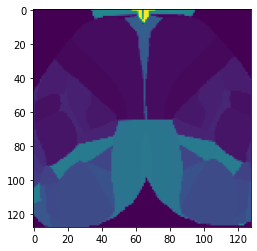

In [3]:
import numpy as np
import matplotlib.pyplot as plt
data= np.load('/media/cat/4TBSSD/yuki/maskwarp.npy')
print (data.shape)

plt.imshow(data)
plt.show()

In [4]:
data = np.load('/media/cat/4TBSSD/yuki/AQ2/tif_files/AQ2am_Apr29_Week8_30Hz/AQ2am_Apr29_Week8_30Hz_code_04_random_ROItimeCourses_15sec_pca_0.95.npy')
print (data.shape)
data2 = np.load('/media/cat/4TBSSD/yuki/AQ2/tif_files/AQ2am_Apr29_Week8_30Hz/AQ2am_Apr29_Week8_30Hz_code_04_trial_ROItimeCourses_15sec_pca_0.95.npy')
print (data2.shape)

(81, 5, 901)
(82, 5, 901)


In [20]:
data = np.load('/media/cat/4TBSSD/yuki/AQ2/SVM_Scores/SVM_Scores_AQ2am_Dec29_30Hz_code_04_trial_ROItimeCourses_15sec_pca_0.95.npy')
data.shape

(901, 10)

In [29]:
data = np.load('/media/cat/4TBSSD/yuki/first_decoding_time_all.npz', allow_pickle=True)
session_nos = data['all_session_nos']
session_nos


array([list([]), list([]), list([]), list([]), list([]),
       list([15, 17, 18, 19, 20, 27, 28, 29, 30, 32, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109])],
      dtype=object)

In [21]:
# load rnn
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# 
rnn_dir = '/mnt/f418adc0-4ff9-410c-93c9-d6d21a1e9c35/yuki/IJ2/temp/rnn/'
svm_dir = '/mnt/f418adc0-4ff9-410c-93c9-d6d21a1e9c35/yuki/IJ2/temp/svm/'

# session:
session = 'Mar9_'

# 
data_rnn = np.load(glob.glob(rnn_dir+'/*'+session+"*.npz")[0])
b_rnn = data_rnn['b_rnn']
print ("rnn data: ", b_rnn.shape)

# load svm
data_svm = np.load(glob.glob(svm_dir+'/*'+session+"*.npy")[0])
data_svm = data_svm[:data_svm.shape[0]//2]
print ("svm data: ", data_svm.shape)

ax=plt.subplot(111)

# plot rnn
std = np.std(b_rnn,1)
mean = np.mean(b_rnn,1)
t=np.arange(b_rnn.shape[0])-9.5
plt.plot(t, mean, color='black')
ax.fill_between(t, mean-std, mean+std, color='black', alpha = 0.2)

# plot svm
std = np.std(data_svm,1)
mean = np.mean(data_svm,1)
t=np.arange(data_svm.shape[0])/30.-10
plt.plot(t, mean, color='blue')
ax.fill_between(t, mean-std, mean+std, color='blue', alpha = 0.2)

plt.xlim(-10,0)
plt.ylim(0.3, 1.0)
plt.show()


rnn data:  (10, 10)
svm data:  (300, 10)


In [113]:
data = np.load('/media/cat/4TBSSD/yuki/IJ2/concatenation_tests/IJ2pm_Feb29_30Hz_random.npy')
print (data.shape)

(93, 6, 900)


In [178]:
animals = ['IA1','IA2','IA3','IJ1','IJ2','AQ2']
root_dir = '/media/cat/4TBSSD/yuki/'
ctr=0
clrs=['black','blue','red','green','magenta','cyan']
for animal in animals:
    fnames = np.load('/media/cat/4TBSSD/yuki/'+animal+'/tif_files.npy')
    n = []
    for fname in fnames:
        session = os.path.split(fname)[1][:-4]
        try:
            data = np.loadtxt(root_dir+animal+'/tif_files/'+session+'/'+session+'_all_locs_selected.txt')
        except:
            continue
        n.append(len(data))

    median = np.mean(n)
    plt.plot([median,median],[0,25],'--',
             linewidth=3,
             c=clrs[ctr])

    #
    total_trials = np.sum(n)
    bins=np.arange(0,210,10)
    y = np.histogram(n, bins)
    plt.plot(y[1][:-1]+5, y[0],
             linewidth=4,
            label=animal+" - "+str(int(median)),
            c=clrs[ctr])
    
    ctr+=1
plt.xlim(bins[0],bins[-1])
plt.legend(fontsize=34)
plt.ylim(0,25)
plt.show()

In [33]:
data = np.load('/media/cat/4TBSSD/yuki/IA1/SVM_Scores/SVM_Scores_IA1pm_Mar2_30Hzcode_04_trial_ROItimeCourses_30sec_Xvalid10_Slidewindow30.npz')
acc = data['accuracy']
print (acc.shape)

(1771, 10)
